# Introduction

In this section, we will use the <a href="../Data/posts.csv">posts.csv</a> dataset to understand what posting times receive more interactions, which means we will answer the question: <b>When to post to receive more interactions?</b>

## Process

This task will require us to follow these steps:

<ul>
<li>Import the required libraries (Pandas, matplotlib, and seaborn) and create the <code>posts</code> DataFeame</li>
<li>Clean the DataFrame</li>
<li>Visualize a chart to see posting times that receive more interactoion</li>
</ul>

# Import the libraries and create the ```posts``` DataFrame

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

posts = pd.read_csv("../Data/posts.csv")

We will then take a look at the DataFrame

In [11]:
posts.head()

,post_title,category,number_of_likes,number_of_comments,date,time
0,Future-proofed regional frame,NaN,297,1,2024-01-01,00:00:00
1,Open-architected well-modulated budgetary mana...,sports,257,570,2024-01-01,06:00:00
2,Centralized next generation toolset,music,251,47,2024-01-01,12:00:00
3,Fully-configurable homogeneous architecture,gaming,17,98,2024-01-01,18:00:00
4,Centralized asynchronous application,NaN,62,2,2024-01-02,00:00:00


# Data Cleaning

As we have seen in the <a href="1-Feed.ipynb">first section</a>, the ```posts``` DataFrame contains null values only in the ```category``` column, which is not one that we will focus on here, this is why the only thing we need to do to clean the DataFrame is to adjust the time format using ```pd.to_datetime()``` as it is a column that we will work on a lot here

In [12]:
posts['time'] = pd.to_datetime(posts['time'], format='%H:%M:%S').dt.hour

# Visualize a chart to find the posting times that receive more interaction

In [13]:
# Define the bin edges for categorizing time values into intervals
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
# Define labels to represent each interval in a readable format
labels = ['0-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-00']
posts['time_range'] = pd.cut(posts['time'], bins=bins, labels=labels, right=False)

## When to receive more likes?

We will first start by plotting a chart that shows us what times receive more likes

/tmp/ipykernel_5907/1030835547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  likes_by_time = posts.groupby('time_range')['number_of_likes'].sum()


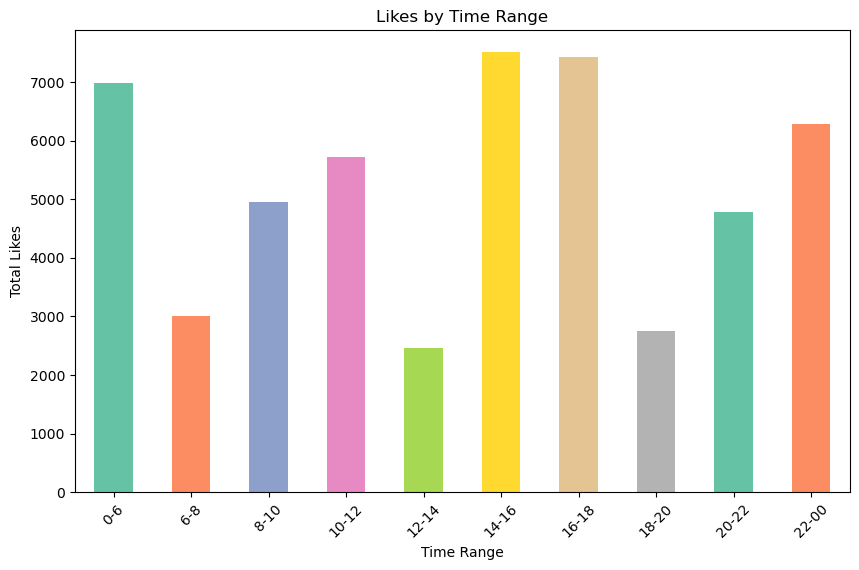

In [14]:
likes_by_time = posts.groupby('time_range')['number_of_likes'].sum()
plt.figure(figsize=(10, 6))
likes_by_time.plot(kind='bar', color=sns.color_palette("Set2"))
plt.xlabel('Time Range')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.title('Likes by Time Range')
plt.savefig("../Visualizations/Likes_by_time.png")
plt.show()

We can see from this chart that the time ranges that receive more likes are from 14:00 to 16:00, from 16:00 to 18:00, and from 00:00 to 06:00

## What time ranges receive more comments?

/tmp/ipykernel_5907/1875129404.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comments_by_time = posts.groupby('time_range')['number_of_comments'].sum()


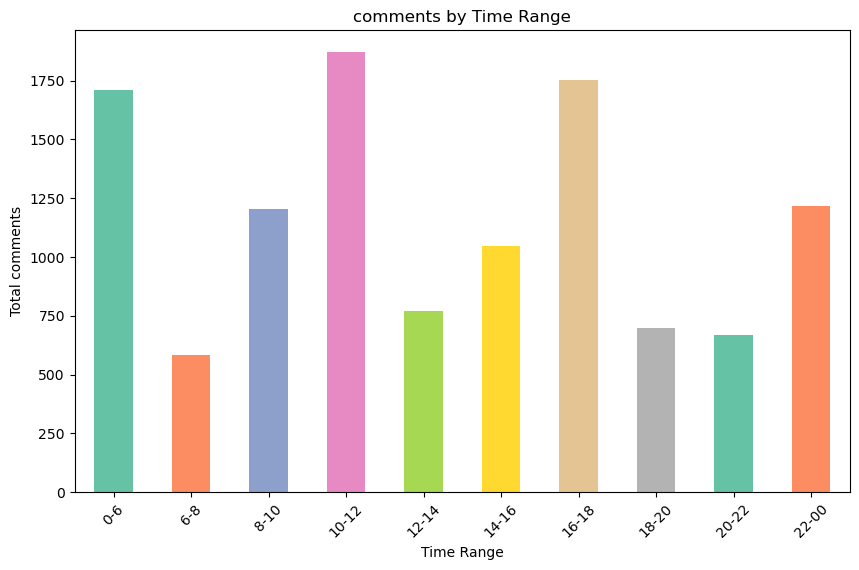

In [15]:
comments_by_time = posts.groupby('time_range')['number_of_comments'].sum()
plt.figure(figsize=(10, 6))
comments_by_time.plot(kind='bar', color=sns.color_palette("Set2"))
plt.xlabel('Time Range')
plt.ylabel('Total comments')
plt.title('comments by Time Range')
plt.xticks(rotation=45)
plt.savefig("../Visualizations/Comments_by_time.png")
plt.show()

This chart shows us that the time ranges that receive more comments are from 10:00 to 12:00, from 16:00 to 18:00, and from 00:00 to 06:00

## What time range receives more interactions overall?

We will start by adding a ```interaction``` column that will include the amount of interaction, which is calculated as the average of the sum of the number of likes and comments

In [16]:
posts["interaction"] = (posts["number_of_likes"] + posts["number_of_comments"]) / 2

Now, all we need to do is plot the chart that represents the time ranges related to the amount of interaction

/tmp/ipykernel_5907/273068936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_by_time = posts.groupby('time_range')['interaction'].sum()


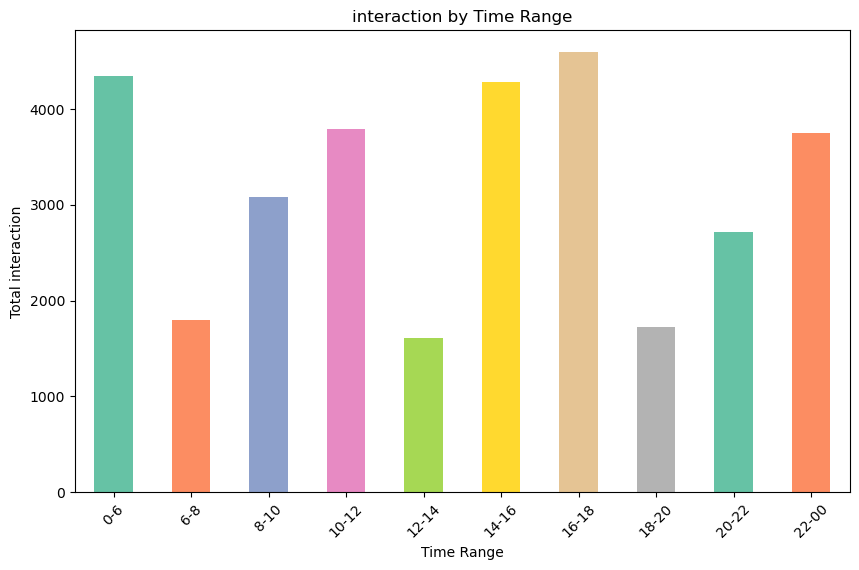

In [17]:
interaction_by_time = posts.groupby('time_range')['interaction'].sum()
plt.figure(figsize=(10, 6))
interaction_by_time.plot(kind='bar', color=sns.color_palette("Set2"))
plt.xlabel('Time Range')
plt.ylabel('Total interaction')
plt.title('interaction by Time Range')
plt.xticks(rotation=45)
plt.savefig("../Visualizations/Interaction_by_time.png")
plt.show()

We can observe from the chart that the time ranges in which the posts receive a bigger amount of overall interaction are from 16:00 to 18:00, from 00:00 to 06:00, and from 14:00 to 16:00

# Conclusion

In this section, we were able to analyze the ```posts``` DataFrame and understand what are the ideal time ranges to post in the platform to receive a bigger amount of likes, comments, and overall interactions

# Next up

In the nex section, we will investigate the ```users``` dataset and try to find which platfroms to promote to our app to receive more users by studying the ```how_did_you_hear_about_us``` column, if you want to check it, please click <a href="4-Promote_the_app.ipynb">here</a>